Research Question: What Makes an App Popular in Google Play? 

In [7]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib as plt
import matplotlib.pyplot as plt


In [8]:
#import the dataset 
googleplay = pd.read_csv("data/googleplaystore.csv")

In [9]:
#Check the dimentions of the dataset 
googleplay.shape

(10841, 13)

In [10]:
googleplay.info()
googleplay.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Data cleaning 

In [5]:
#check for the number of missing values in the dataset 
googleplay.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
googleplay_cleaned = googleplay.copy()

#delete row 10472, where 8 of 13 variables have wrong values
googleplay_cleaned = googleplay_cleaned.drop(10472, axis=0)

#subtitued the NaN value in Type with free since the price is 0 (
googleplay_cleaned[googleplay_cleaned.Type.isnull()]
googleplay_cleaned['Type'].fillna("Free", inplace = True)

#drop all na in rating 
googleplay_cleaned= googleplay_cleaned.dropna(subset=["Rating"])

#Since rating start from 1.0 to 5.0, subsititing NaN with 0 (making 0 as an indecator of unrated apps) 
#googleplay_cleaned['Rating'].fillna(0.0, inplace = True)

# convert Review, price, and Installs to numeric type   
googleplay_cleaned["Reviews"] = googleplay_cleaned["Reviews"].astype("int")

#clean the Installs Variable and convert to float 
googleplay_cleaned['Installs'] = googleplay_cleaned.Installs.str.replace("+","")
googleplay_cleaned['Installs'] = googleplay_cleaned.Installs.str.replace(",","") # because of this fucker '10,000'
googleplay_cleaned["Installs"]= googleplay_cleaned["Installs"].astype("int")

#clean PRice and convert to float 
googleplay_cleaned['Price'] = googleplay_cleaned.Price.str.replace("$","")
googleplay_cleaned["Price"] = googleplay_cleaned["Price"].astype("float64") 

# clean the size variable and convert to float  
googleplay_cleaned['Size'] = googleplay_cleaned.Size.str.replace("M","1e6")
googleplay_cleaned['Size'] = googleplay_cleaned.Size.str.replace("k","1e3")
googleplay_cleaned["Size"] = googleplay_cleaned.Size.str.replace("Varies with device","NaN")
googleplay_cleaned["Size"] = googleplay_cleaned["Size"].astype("float64")
googleplay_cleaned['Size'].fillna(googleplay_cleaned["Size"].mean(), inplace = True)

googleplay_cleaned.isnull().sum()



/var/folders/1q/17wbd_xs3c358lsfdpvlg3lr0000gn/T/ipykernel_30140/1869855069.py:20: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  googleplay_cleaned['Installs'] = googleplay_cleaned.Installs.str.replace("+","")
/var/folders/1q/17wbd_xs3c358lsfdpvlg3lr0000gn/T/ipykernel_30140/1869855069.py:25: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  googleplay_cleaned['Price'] = googleplay_cleaned.Price.str.replace("$","")


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

# Data Analysis: 

## Price: 

In [12]:
googleplay_cleaned.groupby('Type')["Installs"].count().sort_values(ascending=True)

Type
Paid     647
Free    8719
Name: Installs, dtype: int64

Text(0.5, 1.0, 'Type Distribution per Category')

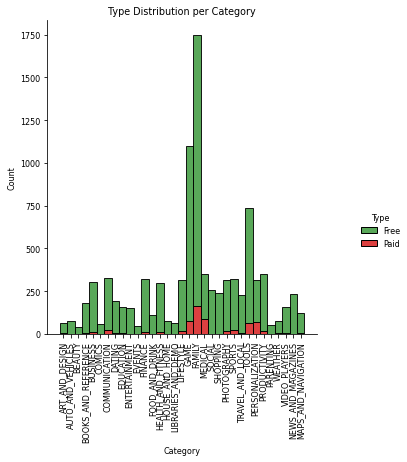

In [24]:
# Free vs Paid distribution based on cato 

sns.displot(
    data=googleplay_cleaned,
    x="Category", hue='Type',
    palette=["#228B22", "#D10000"], 
     multiple="stack"
)
plt.xticks(rotation=90)
plt.rcParams.update({'font.size': 8})
plt.title("Type Distribution per Category")

In [13]:
#divide dataset based Type (free or paid)
Paid_Apps =googleplay_cleaned[ googleplay_cleaned.Type == "Paid"]
Free_Apps =googleplay_cleaned[ googleplay_cleaned.Type == "Free"]
Paid_Apps.Installs.mean()
Free_Apps.Installs.mean()


19217171.161371715

On Averge Free apps are downloaded more than paid apps. 

In [14]:
Paid_Apps[(Paid_Apps.Price <= 19.99) & (Paid_Apps.Price >= 0.99)]["Category"].count()
# 615 out of 647 paid apps 

615

In [15]:
googleplay_cleaned[ googleplay_cleaned.Price > 19.99]["Category"].count()
#32 out of 647 paid apps 

32

/Users/AlaAlBinSaleh/Desktop/misk_DS/new_project/Data_Science_Portfolio/PyProtfolio/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Price Distribution per Category')

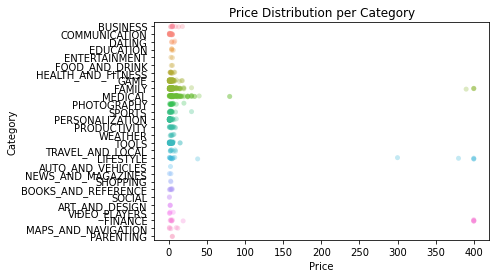

In [16]:
sns.stripplot(Paid_Apps.Price,Paid_Apps.Category, data=Paid_Apps, alpha=0.3)
plt.title("Price Distribution per Category")

The paid apps range from $0.99 to $400. 

The majority (94%) of the paid app falls between $0.99 and $19.99. while the remaining 6% falls beyond this range. 

Categories the fall within this rage are Family, Games, photography, communications, 
Categories such as LIFESTYLE, FINANCE ,MEDICAL have high prices reaching up to 400$


/Users/AlaAlBinSaleh/Desktop/misk_DS/new_project/Data_Science_Portfolio/PyProtfolio/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 20.0)

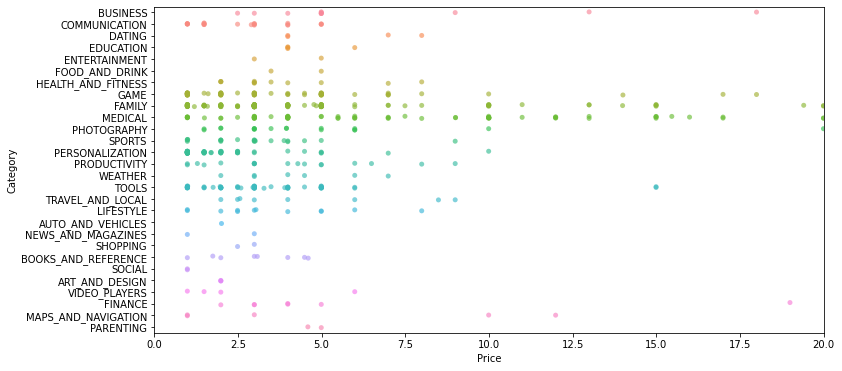

In [17]:
fig, ax = plt.subplots (figsize=(12, 6))
sns.stripplot(Paid_Apps.Price,Paid_Apps.Category, data=Paid_Apps, alpha=0.65)
plt.xlim([0, 20])

the majority of the categories have a rage of $0.99 to approximately $5. beyond $5, fewer categories such as GAMES, Family, and medical extend to $20. 

/Users/AlaAlBinSaleh/Desktop/misk_DS/new_project/Data_Science_Portfolio/PyProtfolio/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(398.0, 410.0)

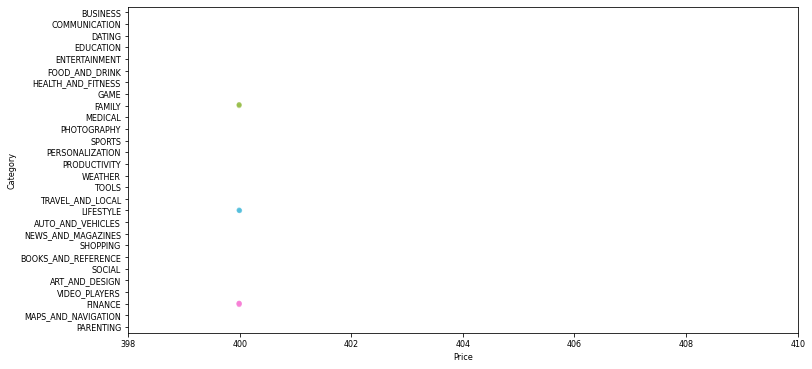

In [65]:
fig, ax = plt.subplots (figsize=(12, 6))
sns.scatterplot(Paid_Apps.Price,Paid_Apps.Category, data=Paid_Apps, alpha=0.50)
plt.xlim([370, 410])

In [18]:
Paid_Apps[(Paid_Apps.Price >= 390)]["Category"].count()

12

There are 14 Apps with a price greater than 300$ 
Two apps within the 300$ range, the remaining 12 Apps have a price of 400$ 

Catergories that have high prices are Family, Finance, Lifestyle. 


## Categories: 

In [19]:
#find cato with the highest installation 
InstallsCat = googleplay_cleaned.groupby(['Category'])["Installs"].count().sort_values(ascending=True)
#find top 10 Cato
InstallsCat.tail(10)

Category
PERSONALIZATION     314
PHOTOGRAPHY         317
SPORTS              319
FINANCE             323
COMMUNICATION       328
MEDICAL             350
PRODUCTIVITY        351
TOOLS               734
GAME               1097
FAMILY             1747
Name: Installs, dtype: int64

<AxesSubplot:>

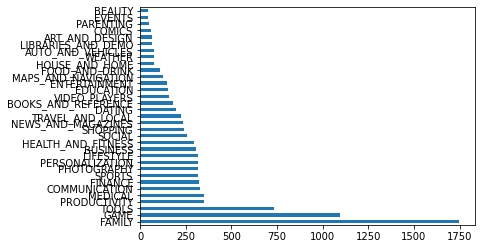

In [20]:
googleplay_cleaned.Category.value_counts().plot(kind='barh')

In [57]:
Games = googleplay_cleaned[googleplay_cleaned.Category == "GAME"]
Games.groupby("Genres")["Installs"].value_counts().sort_values(ascending=True)

Genres  Installs 
Casino  50000000      1
Card    500           1
        50000000      1
Casino  100           1
Word    50000         1
                     ..
Action  100000000    37
        100000       41
Arcade  10000000     46
Action  1000000      56
        10000000     79
Name: Installs, Length: 157, dtype: int64

<AxesSubplot:>

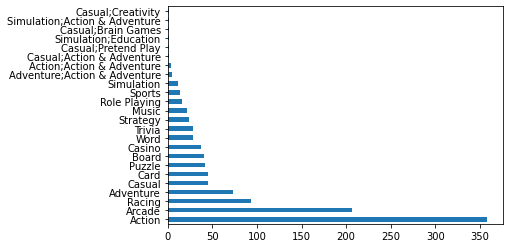

In [58]:
Games.Genres.value_counts().plot(kind='barh')

<AxesSubplot:>

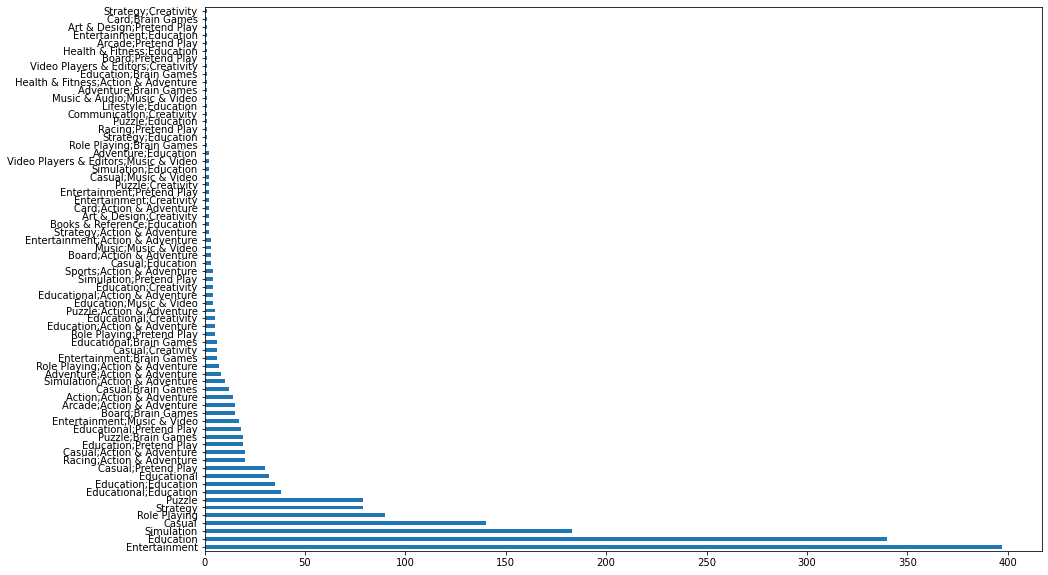

In [69]:
Family = Games = googleplay_cleaned[googleplay_cleaned.Category == "FAMILY"]
Family.groupby("Genres")["Installs"].value_counts().sort_values(ascending=True)
Family.Genres.value_counts().plot(kind='barh',figsize= (15,10))


the most installed Game Apps Genres: Action and Arcade
the most installed Family Apps Genres: Entertainment and Education   

In [72]:
#Entertainment= Family[Family.Genres == "Entertainment"]
#Entertainment["Installs"].max() = 1000000000
#Entertainment[Entertainment.Installs == 1000000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5856,Google Play Games,FAMILY,4.3,7168735,2.133576e+08,1000000000,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device


## Rating: 

In [21]:
#find the average rating, to set it as a threshold 
np.mean(googleplay_cleaned["Rating"])

4.191757420456972

In [22]:
#find cato with the highest installation 
RatingCat = googleplay_cleaned.groupby(['Category'])["Rating"].mean().sort_values(ascending=True)
#find top 5 Cato
RatingCat.tail(30)

Category
VIDEO_PLAYERS          4.063750
LIFESTYLE              4.094904
TRAVEL_AND_LOCAL       4.109292
BUSINESS               4.121452
ENTERTAINMENT          4.126174
FINANCE                4.131889
NEWS_AND_MAGAZINES     4.132189
COMICS                 4.155172
COMMUNICATION          4.158537
FOOD_AND_DRINK         4.166972
LIBRARIES_AND_DEMO     4.178462
MEDICAL                4.189143
AUTO_AND_VEHICLES      4.190411
PHOTOGRAPHY            4.192114
FAMILY                 4.192272
HOUSE_AND_HOME         4.197368
PRODUCTIVITY           4.211396
SPORTS                 4.223511
WEATHER                4.244000
SOCIAL                 4.255598
SHOPPING               4.259664
HEALTH_AND_FITNESS     4.277104
BEAUTY                 4.278571
GAME                   4.286326
PARENTING              4.300000
PERSONALIZATION        4.335987
BOOKS_AND_REFERENCE    4.346067
ART_AND_DESIGN         4.358065
EDUCATION              4.389032
EVENTS                 4.435556
Name: Rating, dtype: float64

The results above shows that more than half of the most intalled categories have a rating that is equal or greater than the average rating of 3.6. 

Therefore, apps the falls in categoriesthat are for everone scores higher in the rating and the number of installation. 

Text(0.5, 1.0, 'Price vs Rating')

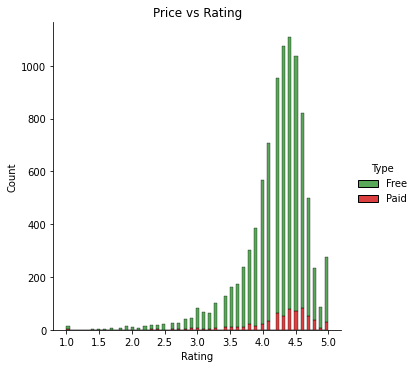

In [23]:
# Price vs rating plots 
sns.displot(
    data=googleplay_cleaned,
    x="Rating", hue='Type',
    palette=["#228B22", "#D10000"], 
     multiple="stack"
)
plt.title("Price vs Rating")

## Content Rating: 

In [24]:
# What makes these categories have high rating and installation number
# check the intened audience for these cato
Categories= googleplay_cleaned[googleplay_cleaned.Category.isin(["FAMILY", "GAME", "TOOLS", "MEDICAL", "BUSINESS"])]
Categories.groupby("Content Rating")["App"].count()


Content Rating
Everyone        3263
Everyone 10+     264
Mature 17+       125
Teen             578
Unrated            1
Name: App, dtype: int64

Apps that are for Everyone and Teen have the most count / Installations 

## Size: 

In [25]:
#Check the the size of Apps 
np.median(googleplay_cleaned["Size"])

211000000.0

<AxesSubplot:xlabel='Size', ylabel='Density'>

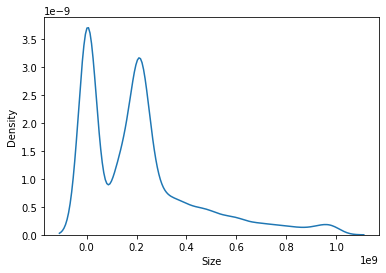

In [26]:
sns.kdeplot(data=googleplay_cleaned, x="Size")

Most apps have a size that 200MB or less ??

## Reviews:

Text(0.5, 1.0, 'Correlation Map between all variables')

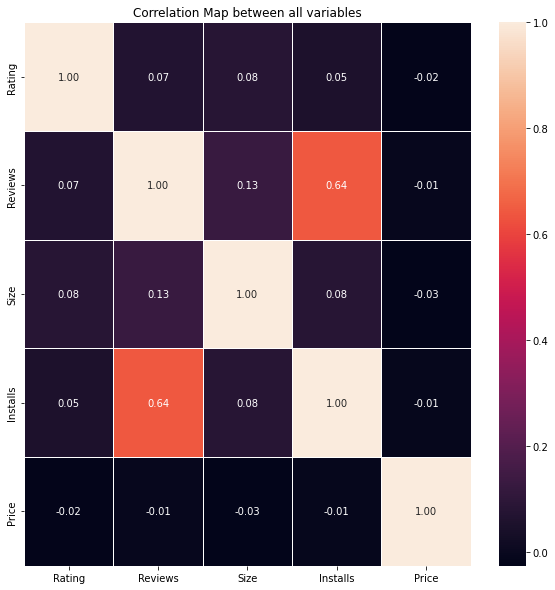

In [27]:
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(googleplay_cleaned.corr(), annot = True, linewidths = .5, fmt = ".2f", ax=ax)
plt.title("Correlation Map between all variables")

In [74]:
np.max(googleplay_cleaned.Installs) # 1000000000
np.max(googleplay_cleaned.Reviews) #~= 80000000
#np.mean(googleplay_cleaned.Reviews) = 514049.8

78158306

In [29]:
googleplay_cleaned[googleplay_cleaned.Reviews> 60000000]
googleplay_cleaned[googleplay_cleaned.Installs > 800000000].sort_values(ascending=True)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,2.133576e+08,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,2.133576e+08,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,2.133576e+08,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,2.133576e+08,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,2.133576e+08,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
341,Hangouts,COMMUNICATION,4.0,3419249,2.133576e+08,1000000000,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,2.133576e+08,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,2.133576e+08,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
386,Hangouts,COMMUNICATION,4.0,3419433,2.133576e+08,1000000000,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,2.133576e+08,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device


Most used social media platforms such as Instagram, Facebook have the high reviews and instullation.  

## Android Version: 

In [35]:
googleplay_cleaned.groupby("Android Ver")["Installs"].count()

Android Ver
1.0 and up               2
1.5 and up              16
1.6 and up              87
2.0 and up              27
2.0.1 and up             7
2.1 and up             113
2.2 and up             208
2.3 and up             582
2.3.3 and up           240
3.0 and up             211
3.1 and up               8
3.2 and up              31
4.0 and up            1131
4.0.3 - 7.1.1            2
4.0.3 and up          1240
4.1 - 7.1.1              1
4.1 and up            2059
4.2 and up             338
4.3 and up             207
4.4 and up             875
4.4W and up              6
5.0 - 6.0                1
5.0 - 8.0                2
5.0 and up             535
5.1 and up              18
6.0 and up              48
7.0 - 7.1.1              1
7.0 and up              41
7.1 and up               3
8.0 and up               5
Varies with device    1319
Name: Installs, dtype: int64

In [36]:
googleplay_cleaned.groupby("Android Ver")["Rating"].count()

Android Ver
1.0 and up               2
1.5 and up              16
1.6 and up              87
2.0 and up              27
2.0.1 and up             7
2.1 and up             113
2.2 and up             208
2.3 and up             582
2.3.3 and up           240
3.0 and up             211
3.1 and up               8
3.2 and up              31
4.0 and up            1131
4.0.3 - 7.1.1            2
4.0.3 and up          1240
4.1 - 7.1.1              1
4.1 and up            2059
4.2 and up             338
4.3 and up             207
4.4 and up             875
4.4W and up              6
5.0 - 6.0                1
5.0 - 8.0                2
5.0 and up             535
5.1 and up              18
6.0 and up              48
7.0 - 7.1.1              1
7.0 and up              41
7.1 and up               3
8.0 and up               5
Varies with device    1319
Name: Rating, dtype: int64

most apps require an Android version 4.0 and up or the Android version depends on the device. 

## Insight summary: 

- Free apps are the most popular. 
- Paid apps the falls within the range of $0.99 and to $5 are most popular among paid apps. the number of categories decreases as the prices go up. 
- Apps that are fall in these categories: family and Games are the most popular since their intended audience is Everyone. 
- Action and Arcade Game Apps and  Entertainment and Education Family Apps are the most installed apps.    
- Apps that have large number of reviews have a large number of installations. 
- Apps size should be no more than 200MB??
- popular apps should have an Android version of 4.0 and up. 


Future work: 
App popularity prediction. 